# Chatbot for Smartphone User Requests

### Scenario 
Devolping a chatbot with machine learning to answer Smartphone Feature user requests. 


### Data Sources

 
https://www.kaggle.com/datasets/artempozdniakov/ukrainian-market-mobile-phones-data (Phone Dataset)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
%matplotlib inline

In [3]:
with open("phone.csv", "rb") as file:
    
    result = chardet.detect(file.read())

# The current encoding
encoding = result["encoding"]
print("Detected encoding:", encoding)

Detected encoding: Windows-1252


In [4]:


with open("phone.csv", "r", encoding="Windows-1252") as input_file:
    content = input_file.read()
    
#Save the file as utf-8
with open("phone_converted.csv", "w", encoding="utf-8") as output_file:
    output_file.write(content)

In [5]:
#Creating Dataframe
df = pd.read_csv("phone_converted.csv", delimiter=";")
df

,brand,model,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,dimentions,weight_g,...,CPU,GPU,internal_memory,primary_camera,secondary_camera,USB,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260.0,...,Quad-core 1.3 GHz Cortex-A53,Mali-T720MP2,16/32 GB,13 MP| autofocus,2 MP| 720p,microUSB 2.0,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169.0,...,Octa-core 1.3 GHz Cortex-A53,Mali-T720MP3,32 GB,13 MP| autofocus| LED flash,5 MP,microUSB 2.0,Removable Li-Po 4080 mAh battery,Black| White,250.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,-,NaN,...,Quad-core 1.25 GHz Cortex-A53,Mali-T720MP2,8 GB,8 MP| autofocus| LED flash,2 MP,microUSB 2.0,Removable Li-Ion 2000 mAh battery,Black| White,120.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,NaN,NaN,NaN,No,No,2016 April,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),NaN,...,Quad-core 1.3 GHz Cortex-A53,Mali-T720 MP2,16/32/64 GB,5 MP,2 MP,microUSB 2.0,Non-removable Li-Ion battery,Black,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166.0,...,Octa-core 1.3 GHz Cortex-A53,Mali-T720MP4,32 GB,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8| autofocus| LED flash,microUSB 2.0,Removable Li-Po 4020 mAh battery,Black| Gold,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,ZTE,F600,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,103 x 48 x 13.5 mm (4.06 x 1.89 x 0.53 in),90.0,...,NaN,NaN,NaN,3.15 MP,Yes,2.0,Removable Li-Ion 800 mAh battery,Black,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f600.jpg
8627,ZTE,F103,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,105 x 46 x 12.6 mm (4.13 x 1.81 x 0.50 in),90.0,...,NaN,NaN,NaN,2 MP,Yes,2.0,Removable Li-Ion 1000 mAh battery,Black| Silver,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f103.jpg
8628,ZTE,F101,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,105 x 46 x 12.6 mm (4.13 x 1.81 x 0.50 in),90.0,...,NaN,NaN,NaN,2 MP,Yes,2.0,Removable Li-Ion 1000 mAh battery,White| Red| Green,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f101.jpg
8629,ZTE,F100,UMTS 850 / 1900 / 2100,NaN,Yes 384 kbps,Class 10,Class 10,2009. Released 2009,105 x 46 x 12.6 mm (4.13 x 1.81 x 0.50 in),90.0,...,NaN,NaN,NaN,2 MP,Yes,2.0,Removable Li-Ion 1000 mAh battery,White| Red| Green,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-f100.jpg


In [6]:
#Printing columns of the dataset
for col in df.columns: 
    print(col)

brand
model
3G_bands
4G_bands
network_speed
GPRS
EDGE
announced
dimentions
weight_g
weight_oz
display_resolution
display_size
OS
CPU
GPU
internal_memory
primary_camera
secondary_camera
USB
battery
colors
approx_price_EUR
img_url


In [7]:
# Drop Columns not needed 
to_drop = ['3G_bands', '4G_bands', 'network_speed', 'GPRS', 'EDGE', 'weight_g', 'weight_oz', 'USB', 'colors','img_url', "GPU", "dimentions", "battery", "secondary_camera"]
new_df = df.drop(to_drop, inplace=False, axis=1)


In [8]:
#rename columns
new_df = new_df.rename(columns={"announced":"published", "display_resolution" : "display resolution", "display_size":"display size", "internal_memory" : "ram", "colors":"colour", "approx_price_EUR" : "price", "primary_camera":"camera",})

for col in new_df.columns: 
    print(col)

    
columns_to_clean = ['display resolution', 'display size', "OS"]

for col in columns_to_clean:
    new_df[col] = new_df[col].str.replace(r'\([^)]*\)', '')
new_df

brand
model
published
display resolution
display size
OS
CPU
ram
camera
price


,brand,model,published,display resolution,display size,OS,CPU,ram,camera,price
0,Acer,Iconia Talk S,2016 August,7.0 inches,720 x 1280 pixels,Android 6.0,Quad-core 1.3 GHz Cortex-A53,16/32 GB,13 MP| autofocus,170.0
1,Acer,Liquid Z6 Plus,2016 August,5.5 inches,1080 x 1920 pixels,Android 6.0,Octa-core 1.3 GHz Cortex-A53,32 GB,13 MP| autofocus| LED flash,250.0
2,Acer,Liquid Z6,2016 August,5.0 inches,720 x 1280 pixels,Android 6.0,Quad-core 1.25 GHz Cortex-A53,8 GB,8 MP| autofocus| LED flash,120.0
3,Acer,Iconia Tab 10 A3-A40,2016 April,10.1 inches,1920 x 1200 pixels,Android 6.0,Quad-core 1.3 GHz Cortex-A53,16/32/64 GB,5 MP,230.0
4,Acer,Liquid X2,2015 April,5.5 inches,720 x 1280 pixels,Android 5.1,Octa-core 1.3 GHz Cortex-A53,32 GB,13 MP| f/1.8| autofocus| LED flash|,230.0
...,...,...,...,...,...,...,...,...,...,...
8626,ZTE,F600,2009. Released 2009,2.4 inches,240 x 320 pixels,NaN,NaN,NaN,3.15 MP,NaN
8627,ZTE,F103,2009. Released 2009,2.0 inches,176 x 220 pixels,NaN,NaN,NaN,2 MP,NaN
8628,ZTE,F101,2009. Released 2009,2.0 inches,176 x 220 pixels,NaN,NaN,NaN,2 MP,NaN
8629,ZTE,F100,2009. Released 2009,2.0 inches,176 x 220 pixels,NaN,NaN,NaN,2 MP,NaN


In [9]:
# Missing values
print(new_df.isna().sum())
new_df.dtypes

brand                    0
model                    0
published               15
display resolution    1214
display size            47
OS                    3723
CPU                   3795
ram                   1822
camera                1193
price                 3628
dtype: int64


brand                  object
model                  object
published              object
display resolution     object
display size           object
OS                     object
CPU                    object
ram                    object
camera                 object
price                 float64
dtype: object

In [10]:
#Dropping the missing values

new_df = new_df.dropna()
print(new_df.isna().sum())
new_df.shape

#Checking for duplicates
duplicates = new_df[new_df.duplicated(subset=['brand', 'model'])]
print(duplicates)

brand                 0
model                 0
published             0
display resolution    0
display size          0
OS                    0
CPU                   0
ram                   0
camera                0
price                 0
dtype: int64
Empty DataFrame
Columns: [brand, model, published, display resolution, display size, OS, CPU, ram, camera, price]
Index: []


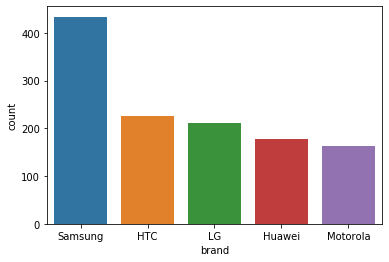

In [11]:

# Top 5 Brands in the dataset 
top_5_values = new_df['brand'].value_counts().head(5)

sns.countplot(x='brand', data=new_df, order=top_5_values.index)


In [12]:
new_df['published'] = new_df['published'].str.slice(stop=4)
new_df.head(5)

C:\Users\gokha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,brand,model,published,display resolution,display size,OS,CPU,ram,camera,price
0,Acer,Iconia Talk S,2016,7.0 inches,720 x 1280 pixels,Android 6.0,Quad-core 1.3 GHz Cortex-A53,16/32 GB,13 MP| autofocus,170.0
1,Acer,Liquid Z6 Plus,2016,5.5 inches,1080 x 1920 pixels,Android 6.0,Octa-core 1.3 GHz Cortex-A53,32 GB,13 MP| autofocus| LED flash,250.0
2,Acer,Liquid Z6,2016,5.0 inches,720 x 1280 pixels,Android 6.0,Quad-core 1.25 GHz Cortex-A53,8 GB,8 MP| autofocus| LED flash,120.0
3,Acer,Iconia Tab 10 A3-A40,2016,10.1 inches,1920 x 1200 pixels,Android 6.0,Quad-core 1.3 GHz Cortex-A53,16/32/64 GB,5 MP,230.0
4,Acer,Liquid X2,2015,5.5 inches,720 x 1280 pixels,Android 5.1,Octa-core 1.3 GHz Cortex-A53,32 GB,13 MP| f/1.8| autofocus| LED flash|,230.0


In [13]:
# Display the years 
new_df["published"].value_counts()

2014    633
2013    499
2015    491
2012    386
2016    369
2011    308
2010    147
2017    142
2009     90
2007     85
2008     64
2006     47
2005     22
Exp.      3
2Q        3
2004      2
Not       1
1Q        1
 201      1
Name: published, dtype: int64

In [14]:
# Deleting unwanted values
unwanted_values = ['Exp.', 'Not ', ' 201', "1Q  ", "2Q  "]
new_df = new_df[~new_df['published'].isin(unwanted_values)]



In [15]:
# Display years after cleaning
new_df["published"].value_counts()

2014    633
2013    499
2015    491
2012    386
2016    369
2011    308
2010    147
2017    142
2009     90
2007     85
2008     64
2006     47
2005     22
2004      2
Name: published, dtype: int64

In [16]:
#Filtering year

new_df = new_df.loc[new_df['published'] > '2013']


In [17]:
#Show the new dataset and the count 
new_df.head(50)
len(new_df)

1635

In [18]:
# Generate question and answers based on the values

def generate_qa_dataset(df):
    
    qa_df = pd.DataFrame(columns=['Frage', 'Antwort'])

    
    for i, row in df.iterrows():
        brand = row['brand']
        model = row['model']
        for column, value in row.items():
            if column not in ['brand', 'model']:
                
               
                if column == 'published':
                    questions = [
                        "What is the published year of {} {}?".format(brand, model),
                        "When was {} {} published?".format(brand, model),
                        "In which year was {} {} released?".format(brand, model)
                    ]
                
                     
                elif column == 'display resolution':
                    questions = [
                        "What is the display resolution of {} {}?".format(brand, model),
                        "What is the resolution of the display on {} {}?".format(brand, model),
                        "How many pixels does the display of {} {} have?".format(brand, model)
                    ]
                elif column == 'display size':
                    questions = [
                        "What is the display size of {} {}?".format(brand, model),
                        "How big is the display on {} {}?".format(brand, model),
                        "What is the diagonal size of the display on {} {}?".format(brand, model)
                    ]
                elif column == 'OS':
                    questions = [
                        "What is the operating system of {} {}?".format(brand, model),
                        "Which operating system does {} {} use?".format(brand, model),
                        "What is the software platform on {} {}?".format(brand, model)
                    ]
                elif column == 'CPU':
                    questions = [
                        "What is the CPU of {} {}?".format(brand, model),
                        "What kind of processor does {} {} have?".format(brand, model),
                        "Which CPU is used in {} {}?".format(brand, model)
                    ]
               
                     
                elif column == 'ram':
                    questions = [
                        "How much RAM does {} {} have?".format(brand, model),
                        "What is the memory capacity of {} {}?".format(brand, model),
                        "What is the RAM size on {} {}?".format(brand, model)
                    ]
                elif column == 'camera':
                    questions = [
                        "What is the resolution of the front camera on {} {}?".format(brand, model),
                        "How many megapixels is the front camera on {} {}?".format(brand, model),
                        "What is the quality of the front-facing camera on {} {}?".format(brand, model)
                    ]

                elif column == 'battery':
                    questions = [
                        "What is the battery capacity of {} {}?".format(brand, model),
                        "How long does the battery of {} {} last?".format(brand, model),
                        "What is the battery life of {} {}?".format(brand, model)
                    ]
                elif column == 'price':
                    questions = [
                        "What is the price of {} {}?".format(brand, model),
                        "How much does {} {} cost?".format(brand, model),
                        "What is the price tag of {} {}?".format(brand, model)
                    ]
                else:
                    continue


                # Answer
                answer = str(value)

                # Append answer to Dataframe
                for question in questions:
                    qa_df = qa_df.append({'Frage': question, 'Antwort': str(value)}, ignore_index=True)
    return qa_df


qa_dataset = generate_qa_dataset(new_df)

# Save the new dataframe
qa_dataset.to_csv('fragen_antworten.csv', index=False)




In [33]:
qa_dataset

,Frage,Antwort
0,What is the published year of Acer Iconia Talk S?,2016
1,When was Acer Iconia Talk S published?,2016
2,In which year was Acer Iconia Talk S released?,2016
3,What is the display resolution of Acer Iconia ...,7.0 inches
4,What is the resolution of the display on Acer ...,7.0 inches
...,...,...
39235,How many megapixels is the front camera on ZTE...,13 MP| autofocus| LED flash
39236,What is the quality of the front-facing camera...,13 MP| autofocus| LED flash
39237,What is the price of ZTE Grand S II S291?,250.0
39238,How much does ZTE Grand S II S291 cost?,250.0


Support Vector Machine

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# Prepare the data 
X = qa_dataset['Frage']  
y = qa_dataset['Antwort']  

# Vectorizing 
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split training test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# train modell 
model = SVC()
model.fit(X_train, y_train)



# Print accuarcy 
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.5942915392456677


Support Vector Machine Mulitclass

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier



X = qa_dataset['Frage']  
y = qa_dataset['Antwort']  


vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)


model = OneVsRestClassifier(SVC())
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7246007475365274


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


X = qa_dataset['Frage']
y = qa_dataset['Antwort']


vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.4938837920489297


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


X = qa_dataset['Frage']
y = qa_dataset['Antwort']


vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)


results = []


max_depth_values = [500, 5000, 50000, 100000]
criterion_values = ['gini', 'entropy', ]


for max_depth in max_depth_values:
    for criterion in criterion_values:
        
        model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
        model.fit(X_train, y_train)

       
        predictions = model.predict(X_test)

        
        accuracy = accuracy_score(y_test, predictions)
        results.append((max_depth, criterion, accuracy))


for result in results:
    print("max_depth:", result[0])
    print("criterion:", result[1])
    print("Accuracy:", result[2])
    print()

max_depth: 500
criterion: gini
Accuracy: 0.4887869520897044

max_depth: 500
criterion: entropy
Accuracy: 0.37895005096839957

max_depth: 5000
criterion: gini
Accuracy: 0.4897213727488957

max_depth: 5000
criterion: entropy
Accuracy: 0.3751274209989806

max_depth: 50000
criterion: gini
Accuracy: 0.4892966360856269

max_depth: 50000
criterion: entropy
Accuracy: 0.37589194699286443

max_depth: 100000
criterion: gini
Accuracy: 0.49218484539585455

max_depth: 100000
criterion: entropy
Accuracy: 0.37657152565409446



Chatbot

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import spacy


nlp = spacy.load('en_core_web_sm')


X = qa_dataset['Frage']  
y = qa_dataset['Antwort']  

# Preprocess NLP
X_preprocessed = []
for question in X:
    doc = nlp(question)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    lemmatized_question = " ".join(tokens)
    X_preprocessed.append(lemmatized_question)


vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_preprocessed)


X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)


model = OneVsRestClassifier(SVC())
model.fit(X_train, y_train)

# Chatbot function
def chatbot(query):
    # Preprocess NLP
    query_doc = nlp(query)
    query_tokens = [token.lemma_.lower() for token in query_doc if not token.is_stop and token.is_alpha]
    query_lemmatized = " ".join(query_tokens)

    # Vectorize query
    query_vectorized = vectorizer.transform([query_lemmatized])

    # Predict answer
    prediction = model.predict(query_vectorized)

    return prediction[0]  # Return the predicted answer


while True:
    user_input = input("User: ")
    if user_input.lower() == 'exit':
        break
    answer = chatbot(user_input)
    print("Chatbot:", answer)

User: screen size Iphone 7
Chatbot: 13 MP| f/2.2| phase detection autofocus| LED flash| 
User: display resolution iphone 7
Chatbot: 4.7 inches 
User: how big is the display iphone 7
Chatbot: 720 x 1280 pixels 
User: cpu iphone 7
Chatbot: Quad-core 1.3 GHz Cortex-A7
User: os iphone 7
Chatbot: 16/32/64/128 GB
User: operating system iphone 7
Chatbot: Android 4.4.2 
